**Machine Learning Classification Problem**

First of all, Credits : https://www.kaggle.com/apapiu/regularized-linear-models?scriptVersionId=1097183

The key point is to to log_transform the numeric variables since most of them are skewed.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

train.head()
#print('_'*80)
#test.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
all_data = pd.concat((train.loc[:,'Pclass':'Embarked'],
                      test.loc[:,'Pclass':'Embarked']))

#all_data.head()

**Data preprocessing:**

Not doing anything fancy

1. First, transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
2. Create Dummy variables for the categorical features
3. Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb025b38d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7feaff1b5ac8>]], dtype=object)

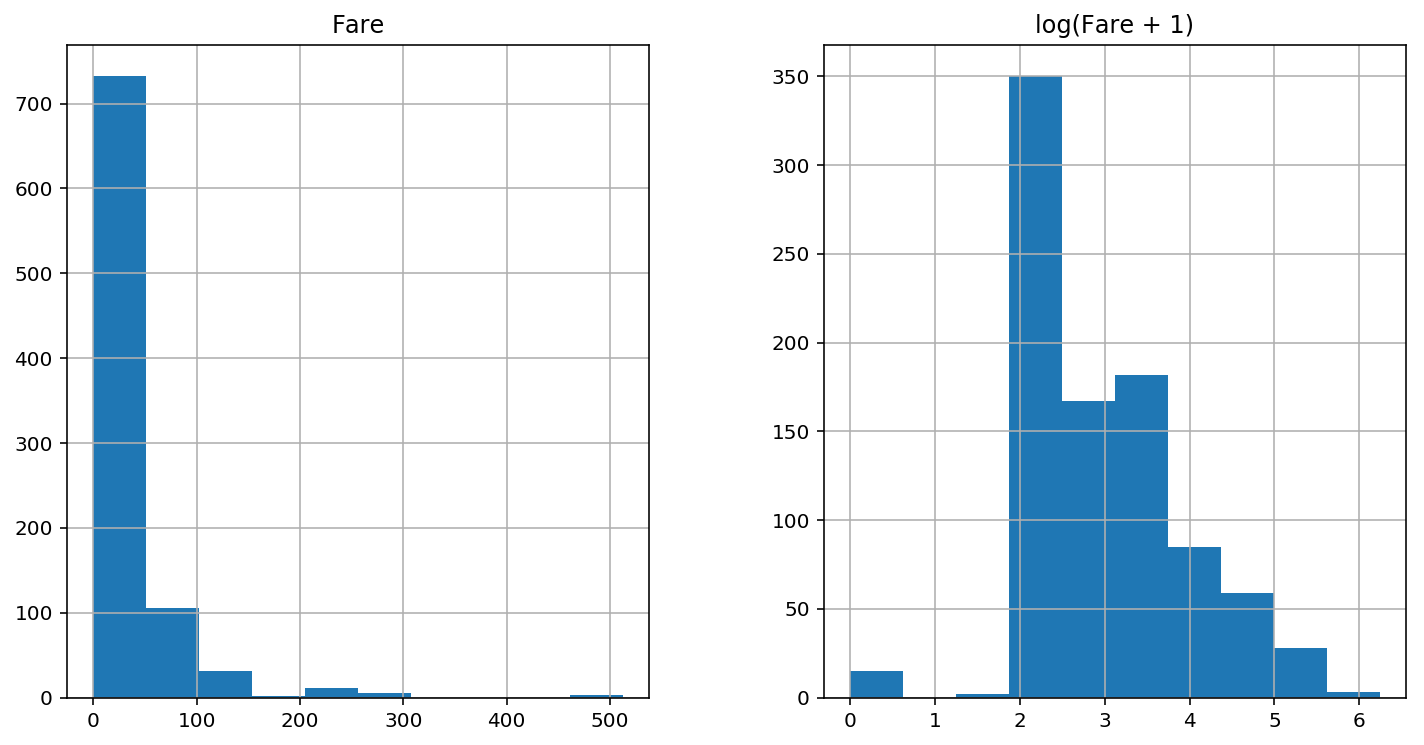

In [4]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Fare":train["Fare"], "log(Fare + 1)":np.log1p(train["Fare"])})
prices.hist()

In [5]:
#log transform the target:
#train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [6]:
all_data = pd.get_dummies(all_data)

In [7]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [8]:
#print(all_data)

In [9]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.Survived
#print(y)

**Models**

Now we are going to use  logistic regression and Random Forest(the two that I know of) from the scikit learn module.

In [10]:
# machine learning
from sklearn.linear_model import LogisticRegression

In [11]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y)
accuracy = round(logreg.score(X_train, y) * 100, 2)
print(accuracy)

logreg_preds = logreg.predict(X_test)



89.11


In [12]:
#Logistic regression submission
#solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived":logreg_preds})
#solution.to_csv("logreg_solution.csv", index = False)

In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y)
random_forest_preds = random_forest.predict(X_test)
random_forest.score(X_train, y)
accuracy = round(random_forest.score(X_train, y) * 100, 2)
print(accuracy)

99.89


Random forest seems to provide more accuracy on the training set. Hence, using it for submisison.

In [14]:
#Random forest submission
solution = pd.DataFrame({"PassengerId":test.PassengerId, "Survived":random_forest_preds})
solution.to_csv("random_forest_solution.csv", index = False)

**Kindly upvote if you find this kernel useful**